In [88]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from skimage.transform import resize

In [80]:
#open the nifti file from ../../DataBase/DataSEt_Preprocessed/Sub-oo104.nii.gz
img = nib.load('../../DataBase/DataSet_Preprocessed/SUB-00104.nii.gz')
#show shape of image
print(img.shape)

(240, 240, 155)


(240, 240)


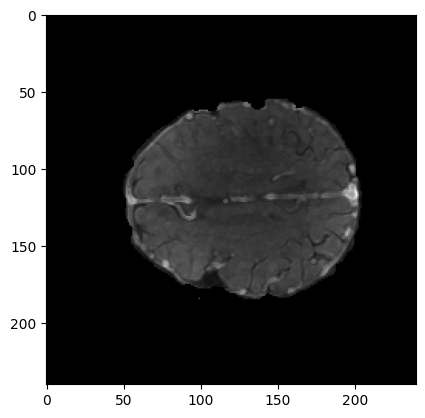

In [81]:
# get the first volume of the image
vol = img.get_fdata()[:, :, 100]
#show the shape of the first volume
print(vol.shape)

plt.imshow(vol, cmap='gray')
plt.show()

In [89]:
# take all images from ../../DataBase/DataSet_Preprocessed/ folder. These are nii.gz files. Each one witha shape of 240x240x155. I need to create a new folder ../../DataBase/DataSet_Preprocessed_RGB/ with each image in the shape 155x240x240x3
import os
import nibabel as nib
import numpy as np

# Define input and output directories
input_dir = '../../DataBase/DataSet_Preprocessed/'
output_dir = '../../DataBase/DataSet_Preprocessed_RGB/'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Iterate over all .nii.gz files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.nii.gz'):
        # Load the nifti file
        img = nib.load(os.path.join(input_dir, filename))

        # Get the image data
        data = img.get_fdata()

        # Initialize an empty array for the RGB data
        #rgb_data = np.zeros((data.shape[2], data.shape[0], data.shape[1], 3))

        # Initialize an empty array for the RGB data with the correct shape
        rgb_data = np.zeros((data.shape[2], 224, 224, 3))

        # Convert each slice to RGB
        for i in range(data.shape[2]):
            #slice_rgb = np.stack((data[:, :, i],) * 3, axis=-1)

            slice_resized = resize(data[:, :, i], (224, 224), anti_aliasing=True)
            slice_rgb = np.stack((slice_resized,) * 3, axis=-1)
            rgb_data[i] = slice_rgb

        # Save the RGB data as a new nifti file
        new_img = nib.Nifti1Image(rgb_data, img.affine)
        nib.save(new_img, os.path.join(output_dir, filename))

print("Conversion complete.")


Conversion complete.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.4836063385009766].


(240, 240, 3)


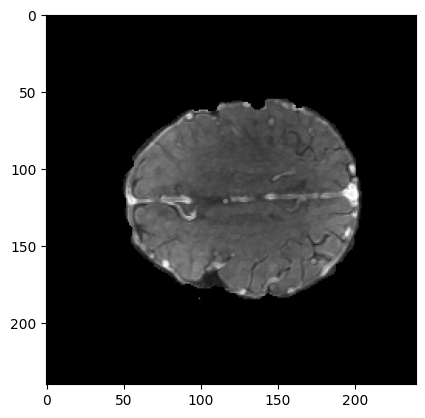

In [90]:
# convert the vol image to have rgb channels
vol_rgb = np.stack((vol,) * 3, axis=-1)
print(vol_rgb.shape)
plt.imshow(vol_rgb, cmap='gray')
plt.show()


In [91]:
# open the first image from the new folder
img = nib.load('../../DataBase/DataSet_Preprocessed_RGB/SUB-00104.nii.gz')
#show shape of image
print(img.shape)

(155, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.2703523754465333].


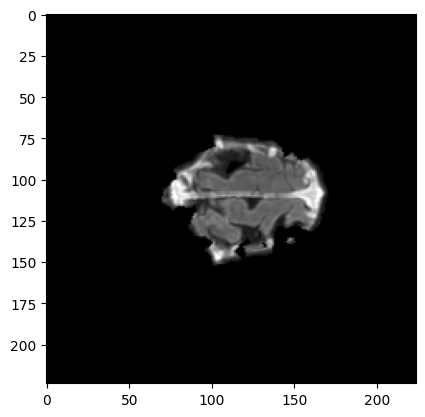

In [92]:
# show the a volume of the image
vol = img.get_fdata()[131]
plt.imshow(vol)
plt.show()

In [154]:
import os
import shutil

# Define input and output directories
input_images_dir = '../../DataBase/DataSet_Preprocessed_RGB/'
input_masks_dir = '../../DataBase/MASK/'
output_images_dir = '../../DataBase/DataSet_Preprocessed_RGB_clear/'
output_masks_dir = '../../DataBase/MASK_CLEAR/'

# Create the output directories if they don't exist
os.makedirs(output_images_dir, exist_ok=True)
os.makedirs(output_masks_dir, exist_ok=True)

# Get the list of image filenames without extensions
image_filenames = {os.path.splitext(filename)[0] for filename in os.listdir(input_images_dir) if
                   filename.endswith('.nii.gz')}

# Iterate over all mask files in the input masks directory
for mask_filename in os.listdir(input_masks_dir):
    if mask_filename.endswith('.nii.gz'):
        # Extract the base name without the 'MASK-' prefix
        base_name = mask_filename.replace('MASK-', 'SUB-')
        base_name_no_gz = base_name.replace('.gz', '')

        # Check if the corresponding image exists
        if base_name_no_gz in image_filenames:
            # Copy the image to the output directory
            shutil.copy(os.path.join(input_images_dir, base_name),
                        os.path.join(output_images_dir, base_name))
            
            # Copy the mask to the output directory
            shutil.copy(os.path.join(input_masks_dir, mask_filename),
                        os.path.join(output_masks_dir, mask_filename))

print("Filtered images and masks have been copied to the new directories.")

Filtered images and masks have been copied to the new directories.


In [155]:
# print the total files in the ../../DataBase/DataSet_Preprocessed_RGB_clear folder and ../../DataBase/MASK_CLEAR folder
print(len(os.listdir(output_images_dir)))
print(len(os.listdir(output_masks_dir)))

439
439


In [149]:
# Load nifti mask image from ../../DataBase/MASK_CLEAR/SUB-00104.nii.gz
mask = nib.load('../../DataBase/MASK_CLEAR/MASK-00104.nii.gz')
#show shape of image
print(mask.shape)

(240, 240, 155)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.28925139669861].


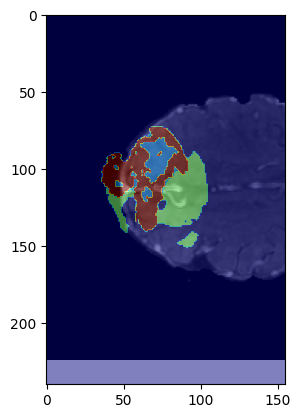

In [158]:
#show the volume of the image (the image has shape 240x240x155) and plot the original image with the mask image
original_image = nib.load('../../DataBase/DataSet_Preprocessed_RGB_clear/SUB-00104.nii.gz')
new_mask = nib.load('../../DataBase/MASK_CLEAR/MASK-00104.nii.gz')

mask_number = 100
vol = original_image.get_fdata()[ mask_number]
mask_vol = new_mask.get_fdata()[ mask_number]
plt.imshow(vol, cmap='gray')
plt.imshow(mask_vol, cmap='jet', alpha=0.5)
plt.show()

In [157]:
mask = nib.load('../../DataBase/MASK_CLEAR/MASK-00104.nii.gz')
mask = mask.get_fdata()
unique_values = np.unique(mask)

# Find unique values in the entire mask
unique_values = np.unique(mask)
print(f"Number of unique classes: {len(unique_values)}")
print(f"Unique values found: {unique_values}")



Number of unique classes: 4
Unique values found: [0. 1. 2. 4.]
